In [33]:
import tensorflow as tf
import numpy as np
from matplotlib.colors import ListedColormap #Uncomment these if you have installed matplotlib (pip3 install matplotlib)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
with open("x_circles.data",'rb') as f:
    x = np.load(f)
with open("y_circles.data",'rb') as f:
    y = np.load(f).reshape(-1,1)

In [35]:
x.shape, y.shape

((100, 2), (100, 1))

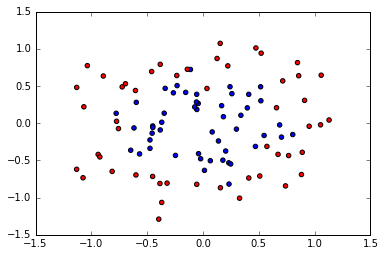

In [36]:
scatter(x[:,0], x[:,1], c=y, cmap= ListedColormap(['#FF0000', '#0000FF']))

In [37]:
class LogisticRegression():
    def __init__(self, batchsize, xsize, optimizer=tf.train.GradientDescentOptimizer):
        self.learning_rate = tf.Variable(0.0, dtype=tf.float32, trainable=False)
        self.x = tf.placeholder(shape=(batchsize, xsize), dtype=tf.float32, name="x")
        self.y = tf.placeholder(shape=(batchsize,1), dtype=tf.float32, name="y")
        w = tf.get_variable("w", shape=(xsize,1))
        b = tf.get_variable("b", shape=(1))
        logit = tf.add(tf.matmul(self.x,w),b) #Broadcast
        self.proba = tf.sigmoid(logit)
        self.loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=self.y)) 
        self.train = optimizer(self.learning_rate).minimize(self.loss)

In [38]:
initializer = tf.random_uniform_initializer(minval=-0.05, maxval=0.05)
with tf.variable_scope("LR", reuse=None, initializer=initializer):
    lr = LogisticRegression(100,2)

ValueError: Variable LR/w already exists, disallowed. Did you mean to set reuse=True in VarScope? Originally defined at:

  File "<ipython-input-5-77d2899a4887>", line 6, in __init__
    w = tf.get_variable("w", shape=(xsize,1))
  File "<ipython-input-6-a175c081b5bf>", line 3, in <module>
    lr = LogisticRegression(100,2)
  File "/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)


In [39]:
[(t.name, t.get_shape().as_list()) for t in tf.trainable_variables()]

[(u'LR/w:0', [2, 1]),
 (u'LR/b:0', [1]),
 (u'MLP/w:0', [2, 2]),
 (u'MLP/b:0', [2]),
 (u'MLP/w2:0', [2, 1]),
 (u'MLP/b2:0', [1]),
 (u'MLP_adam/w:0', [2, 2]),
 (u'MLP_adam/b:0', [2]),
 (u'MLP_adam/w2:0', [2, 1]),
 (u'MLP_adam/b2:0', [1]),
 (u'MLP3/w:0', [2, 2]),
 (u'MLP3/b:0', [2]),
 (u'MLP3/w2:0', [2, 2]),
 (u'MLP3/b2:0', [2]),
 (u'MLP3/w3:0', [2, 1]),
 (u'MLP3/b3:0', [1])]

In [40]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer()) #Set w,b to random values from distribution
sess.run(tf.assign(lr.learning_rate, 0.1))

0.1

In [41]:
output = sess.run([lr.loss, lr.train], feed_dict={lr.x:x, lr.y:y})
print(output)

[0.69330519, None]


In [42]:
for i in range(10000):
    loss, proba, _ = sess.run([lr.loss, lr.proba, lr.train], feed_dict={lr.x:x, lr.y:y})
    if i % 1000 == 0:
        proba = sess.run(lr.proba, feed_dict={lr.x:x, lr.y:y})
        accuracy = (np.where(proba >= 0.5, 1, 0) == y).mean()
        print(loss, accuracy)

(0.69329619, 0.46000000000000002)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)


In [43]:
sess.run(tf.global_variables_initializer()) #Make weights random again
sess.run(tf.assign(lr.learning_rate, 1.0))

1.0

In [12]:
for i in range(10000):
    loss, proba, _ = sess.run([lr.loss, lr.proba, lr.train], feed_dict={lr.x:x, lr.y:y})
    accuracy = (np.where(proba >= 0.5, 1, 0) == y).mean()
    if i % 1000 == 0:
        print(loss, accuracy)

(0.69332671, 0.60999999999999999)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)
(0.69311303, 0.47999999999999998)


In [13]:
class MLP():
    def __init__(self, batchsize, xsize, optimizer=tf.train.GradientDescentOptimizer):
        self.learning_rate = tf.Variable(0.0, dtype=tf.float32, trainable=False)
        self.x = tf.placeholder(shape=(batchsize, xsize), dtype=tf.float32, name="x")
        self.y = tf.placeholder(shape=(batchsize,1), dtype=tf.float32, name="y")
        
        #Hidden Layer
        w = tf.get_variable("w", shape=(xsize, 2))
        b = tf.get_variable("b", shape=(2))
        hidden = tf.sigmoid(tf.matmul(self.x,w) + b) 
        
        w2 = tf.get_variable("w2", shape=(2,1))
        b2 = tf.get_variable("b2", shape=(1))
        logit = tf.matmul(hidden,w2) + b2
        
        self.proba = tf.sigmoid(logit)
        self.loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=self.y)) 
        self.train = optimizer(self.learning_rate).minimize(self.loss)

In [14]:
with tf.variable_scope("MLP", reuse=None, initializer=initializer):
    mlp = MLP(100, 2)
    sess.run(tf.global_variables_initializer())
    sess.run(tf.assign(mlp.learning_rate, 0.1))

In [15]:
for i in range(10000):
    loss, proba,  _  = sess.run([mlp.loss, mlp.proba, mlp.train], feed_dict={mlp.x:x, mlp.y:y})
    if i % 1000 == 0:
        accuracy = (np.where(proba >= 0.5, 1, 0) == y).mean()                                                       
        print(loss, accuracy)

(0.6931476, 0.5)
(0.69314599, 0.5)
(0.69314575, 0.5)
(0.69314557, 0.52000000000000002)
(0.69314528, 0.53000000000000003)
(0.69314516, 0.53000000000000003)
(0.69314486, 0.52000000000000002)
(0.69314462, 0.53000000000000003)
(0.69314432, 0.52000000000000002)
(0.69314402, 0.51000000000000001)


In [16]:
sess.run(tf.global_variables_initializer()) #Make weights random again
sess.run(tf.assign(mlp.learning_rate, 1.0))

1.0

In [17]:
for i in range(20000):
    loss, proba, _  = sess.run([mlp.loss, mlp.proba, mlp.train], feed_dict={mlp.x:x, mlp.y:y})
    if i % 1000 == 0:
        accuracy = (np.where(proba >= 0.5, 1, 0) == y).mean()                                                       
        print(loss, accuracy)

(0.69323421, 0.5)
(0.69314742, 0.47999999999999998)
(0.69314682, 0.45000000000000001)
(0.69314593, 0.51000000000000001)
(0.69314402, 0.53000000000000003)
(0.69314003, 0.52000000000000002)
(0.693133, 0.48999999999999999)
(0.69312316, 0.48999999999999999)
(0.69311112, 0.48999999999999999)
(0.69309282, 0.48999999999999999)
(0.6930455, 0.48999999999999999)
(0.69272965, 0.47999999999999998)
(0.60118383, 0.72999999999999998)
(0.48980823, 0.80000000000000004)
(0.48427278, 0.81000000000000005)
(0.4816356, 0.80000000000000004)
(0.47943482, 0.79000000000000004)
(0.47702241, 0.79000000000000004)
(0.47438905, 0.79000000000000004)
(0.47190312, 0.79000000000000004)


In [18]:
with tf.variable_scope("MLP_adam", reuse=None, initializer=initializer):
    mlp = MLP(100, 2, optimizer=tf.train.AdamOptimizer)
    sess.run(tf.global_variables_initializer())
    sess.run(tf.assign(mlp.learning_rate,0.001))

In [19]:
for i in range(10000):
    loss, proba,  _  = sess.run([mlp.loss, mlp.proba, mlp.train], feed_dict={mlp.x:x, mlp.y:y}) 
    if i % 1000 == 0:
        accuracy = (np.where(proba >= 0.5, 1, 0) == y).mean()                                                       
        print(loss, accuracy)

(0.69314766, 0.5)
(0.6472404, 0.67000000000000004)
(0.59124547, 0.66000000000000003)
(0.56631339, 0.68000000000000005)
(0.52019483, 0.75)
(0.50108832, 0.79000000000000004)
(0.4929058, 0.81000000000000005)
(0.48796532, 0.81000000000000005)
(0.48499689, 0.81000000000000005)
(0.48293218, 0.80000000000000004)


In [20]:
sess.run(tf.global_variables_initializer()) #Make weights random again
sess.run(tf.assign(mlp.learning_rate, 0.01))

0.0099999998

In [21]:
for i in range(10000):
    loss, proba,  _  = sess.run([mlp.loss, mlp.proba, mlp.train], feed_dict={mlp.x:x, mlp.y:y}) 
    if i % 1000 == 0:
        accuracy = (np.where(proba >= 0.5, 1, 0) == y).mean()                                                       
        print(loss, accuracy)

(0.69360059, 0.5)
(0.52470893, 0.76000000000000001)
(0.52021736, 0.76000000000000001)
(0.51940733, 0.75)
(0.51890546, 0.75)
(0.51858318, 0.75)
(0.51841646, 0.75)
(0.51832813, 0.75)
(0.51823694, 0.75)
(0.51791131, 0.75)


In [22]:
# Baseline optimizer: GradientDescent with starting learning rate of 0.1
# Often the easiest optimizer out of the box: AdamOptimizer with starting learning rate of 0.001
# To do quick checks of learning rate starting values try going up or down 10x (so check within 1.0, 0.1, 0.01)
# Some have found Adam to learn faster, but SGD to eventually get better accuracy
# Google state of the art Neural Machine Translation uses Adam for most of the training
# and then finishes with some SGD (and then Reinforcement Learning!!)
# https://arxiv.org/pdf/1609.08144v2.pdf

In [23]:
x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0]).reshape(-1,1)

In [24]:
#scatter(x[:,0], x[:,1], c=y, cmap= ListedColormap(['#FF0000', '#0000FF']))

In [25]:
class MLP3():
    def __init__(self, batchsize, xsize, optimizer=tf.train.GradientDescentOptimizer):
        self.learning_rate = tf.Variable(0.0, dtype=tf.float32, trainable=False)
        self.x = tf.placeholder(shape=(batchsize, xsize), dtype=tf.float32, name="x")
        self.y = tf.placeholder(shape=(batchsize,1), dtype=tf.float32, name="y")
        
        #Hidden1
        w = tf.get_variable("w", shape=(xsize, 2))
        b = tf.get_variable("b", shape=(2))
        hidden1 = tf.square(tf.matmul(self.x,w) + b)
        
        #hidden2
        w2 = tf.get_variable("w2", shape=(xsize, 2))
        b2 = tf.get_variable("b2", shape=(2))
        hidden2 = tf.square(tf.matmul(hidden1,w2) + b2)
        
        w3 = tf.get_variable("w3", shape=(2,1))
        b3 = tf.get_variable("b3", shape=(1))
        logit = tf.matmul(hidden2,w3) + b3
        
        self.proba = tf.sigmoid(logit)
        self.loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=self.y)) 
        self.train = optimizer(self.learning_rate).minimize(self.loss)

In [26]:
with tf.variable_scope("MLP3", reuse=False, initializer=tf.random_uniform_initializer(minval=-0.05, maxval=0.05)):
    mlp = MLP3(None, 2, optimizer=tf.train.AdamOptimizer)
    sess.run(tf.global_variables_initializer())
    sess.run(tf.assign(mlp.learning_rate, 0.1))

In [27]:
sess.run(tf.global_variables_initializer())
sess.run(tf.assign(mlp.learning_rate, 1.0))

1.0

In [28]:
for i in range(10000):
    loss, proba,  _  = sess.run([mlp.loss, mlp.proba, mlp.train], feed_dict={mlp.x:x, mlp.y:y}) 
    if i % 1000 == 0:
        accuracy = (np.where(proba >= 0.5, 1, 0) == y).mean()                                                       
        print(loss, accuracy)

(0.69323492, 0.5)
(1.3768145e-06, 1.0)
(8.702745e-07, 1.0)
(5.1648624e-07, 1.0)
(3.0078451e-07, 1.0)
(1.7479486e-07, 1.0)
(1.0221274e-07, 1.0)
(6.0635621e-08, 1.0)
(3.6723403e-08, 1.0)
(2.2834023e-08, 1.0)
